# Requirements

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.neighbors import KNeighborsClassifier

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [122]:
df = pd.read_csv('user_behavior_data.csv')

Preprocess the input and the output variables appropriately.

In [116]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

Explore the dataset using visualizations of your choice.

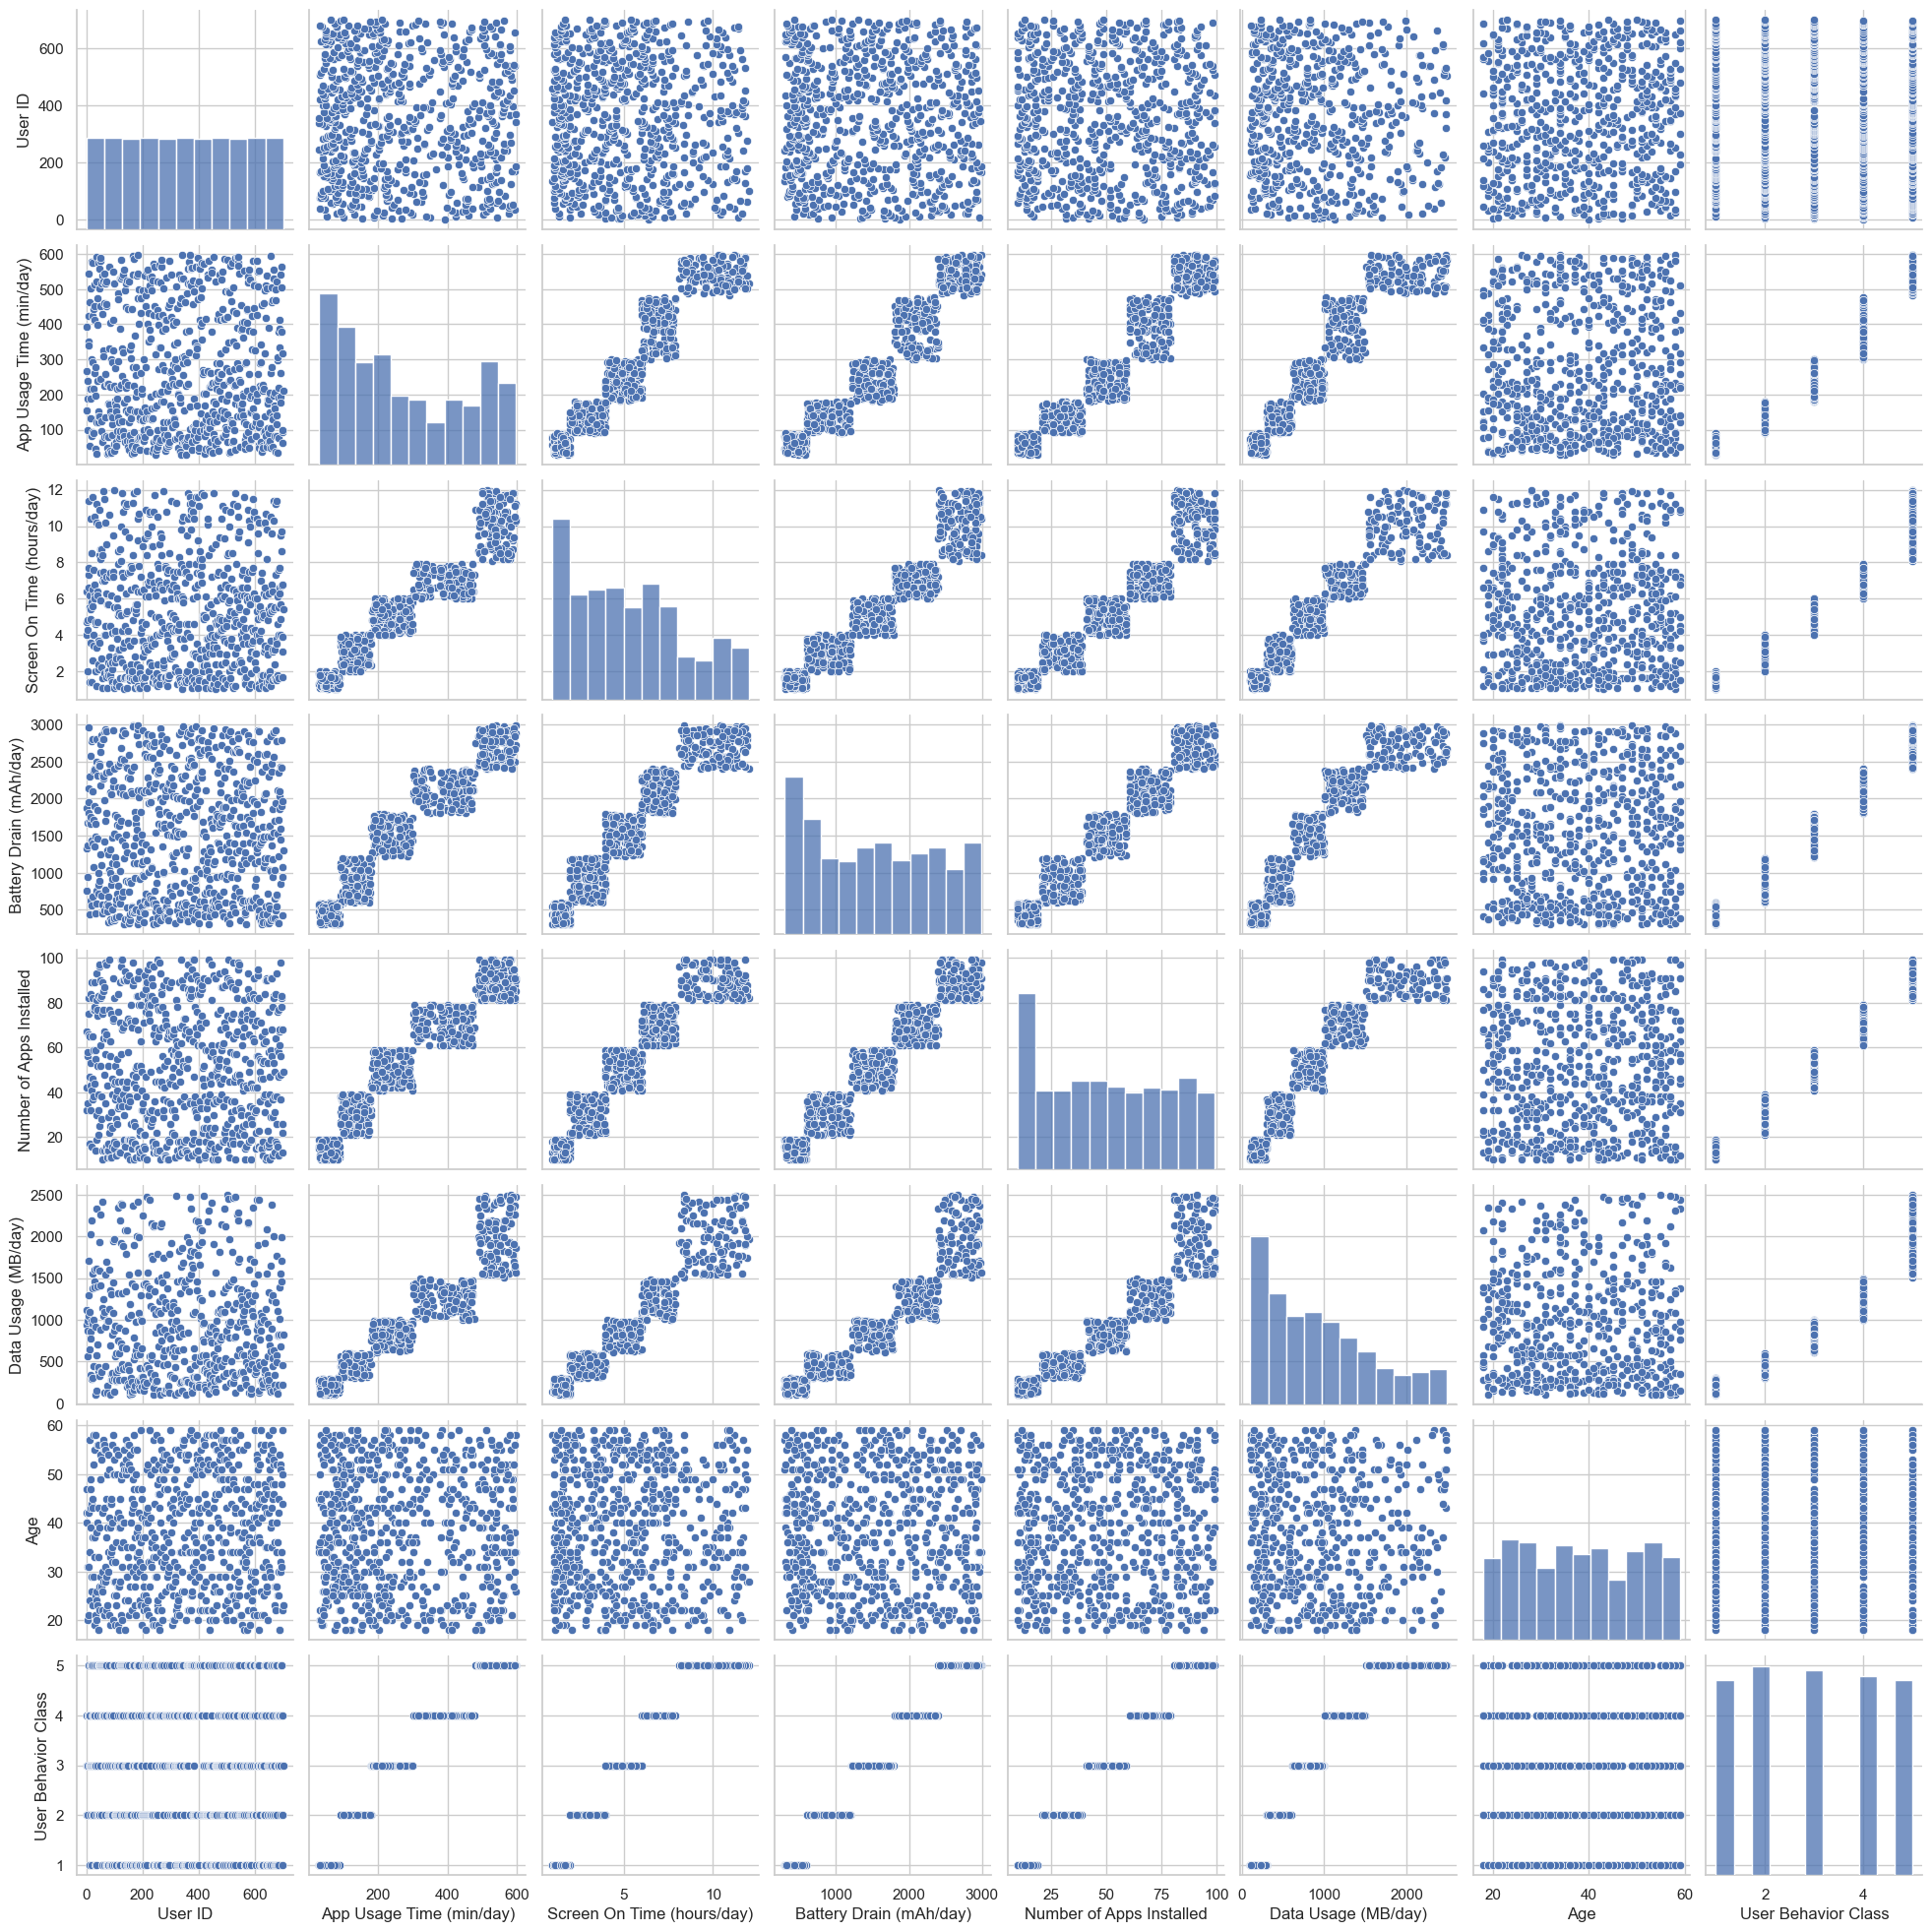

In [75]:
sns.set_theme(style="whitegrid")
sns.pairplot(df)
plt.show()

Check if the dataset is balanced.

<Axes: ylabel='Frequency'>

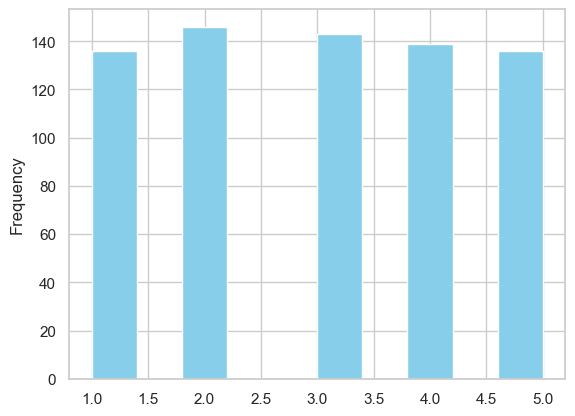

In [76]:
df['User Behavior Class'].plot(kind='hist', color='skyblue')

<Axes: ylabel='Frequency'>

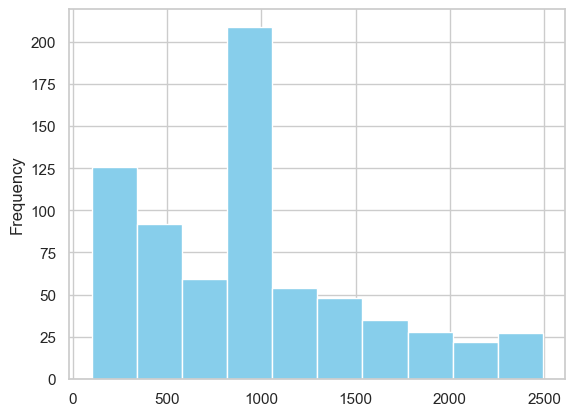

In [165]:
df['Data Usage (MB/day)'].plot(kind='hist', color='skyblue')

In [114]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,942,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,4,1,92,3.9,1082,26,942,22,1,2
696,697,3,0,316,6.8,1965,68,942,59,1,4
697,698,0,0,99,3.1,942,22,457,50,0,2
698,699,2,0,62,1.7,431,13,224,44,1,1


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [117]:
missing = df.isnull().sum() / len(df) * 100
missing = missing.reset_index().rename(columns={"index": "column", 0:"percent_missing"})
missing

,column,percent_missing
0,User ID,0.0
1,Device Model,0.0
2,Operating System,10.0
3,App Usage Time (min/day),0.0
4,Screen On Time (hours/day),0.0
5,Battery Drain (mAh/day),0.0
6,Number of Apps Installed,0.0
7,Data Usage (MB/day),20.0
8,Age,5.0
9,Gender,0.0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

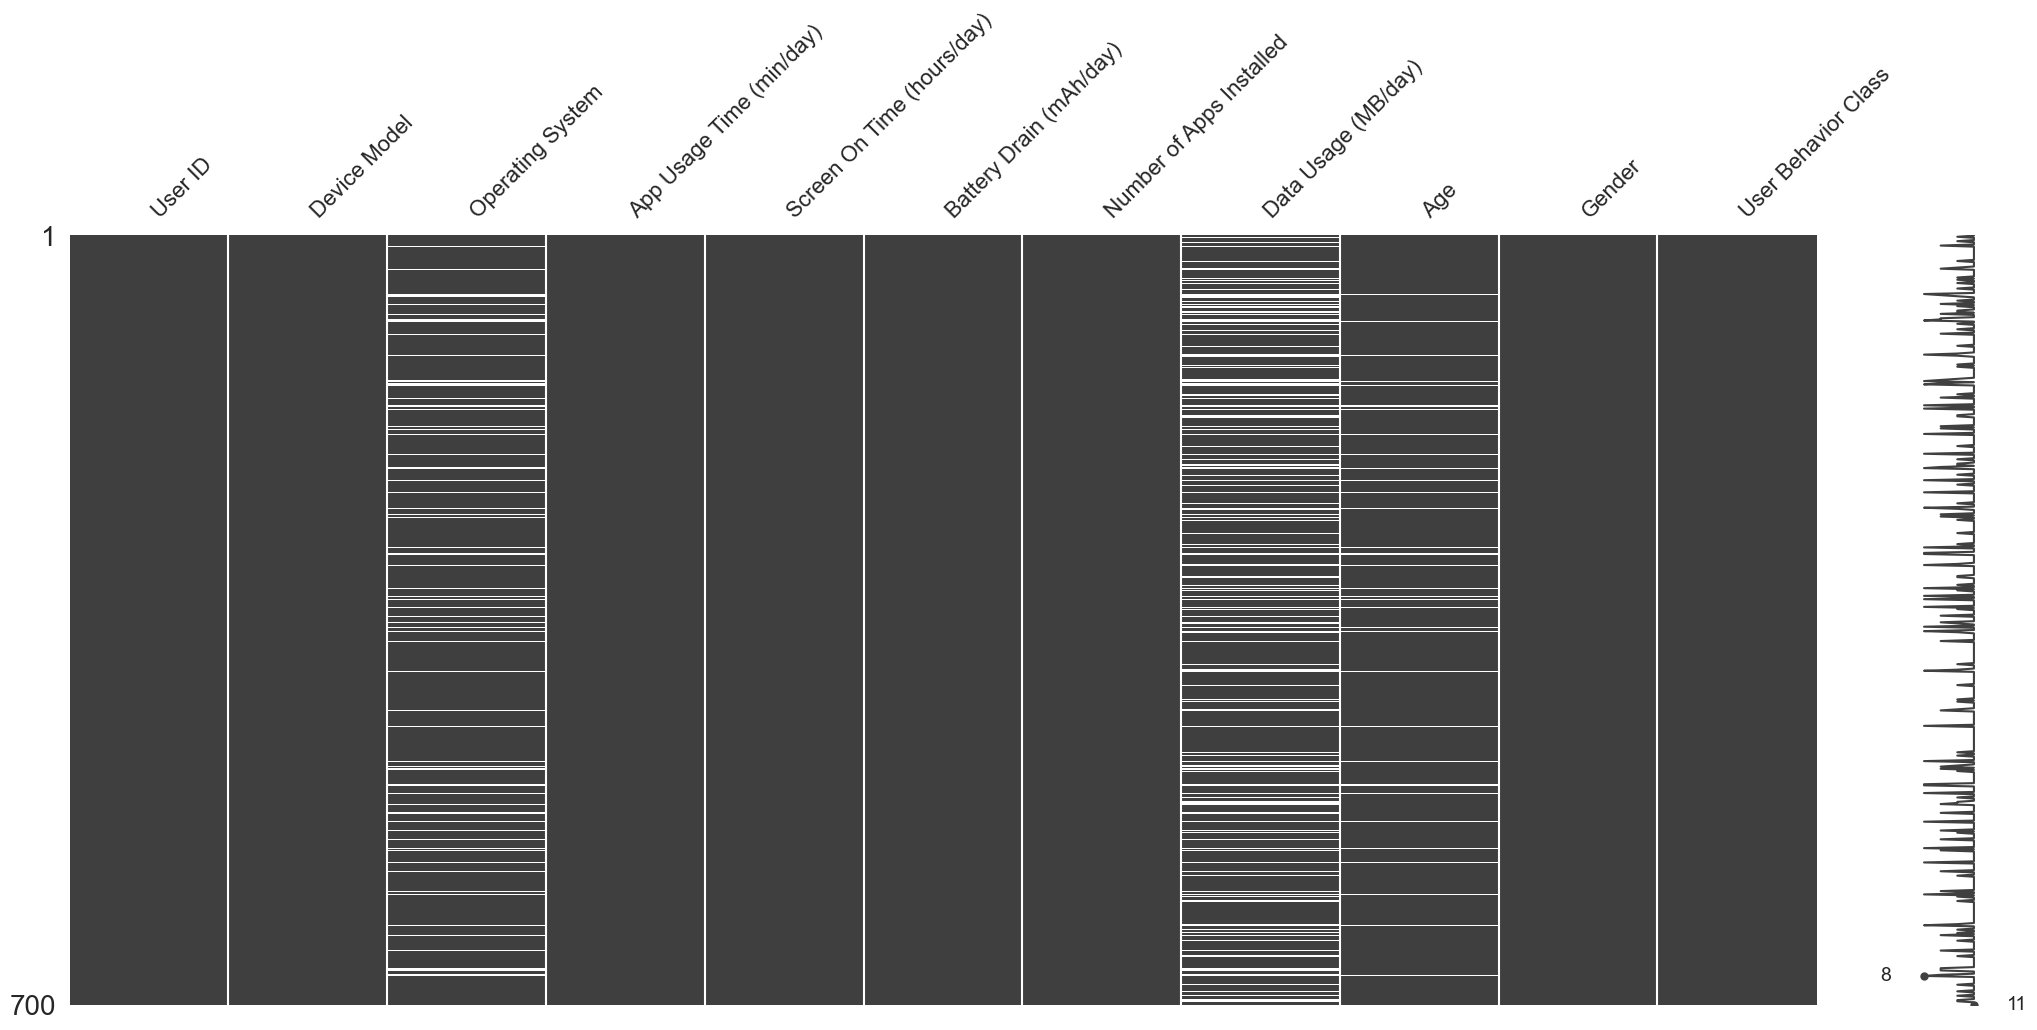

In [87]:
msno.matrix(df)
plt.show()

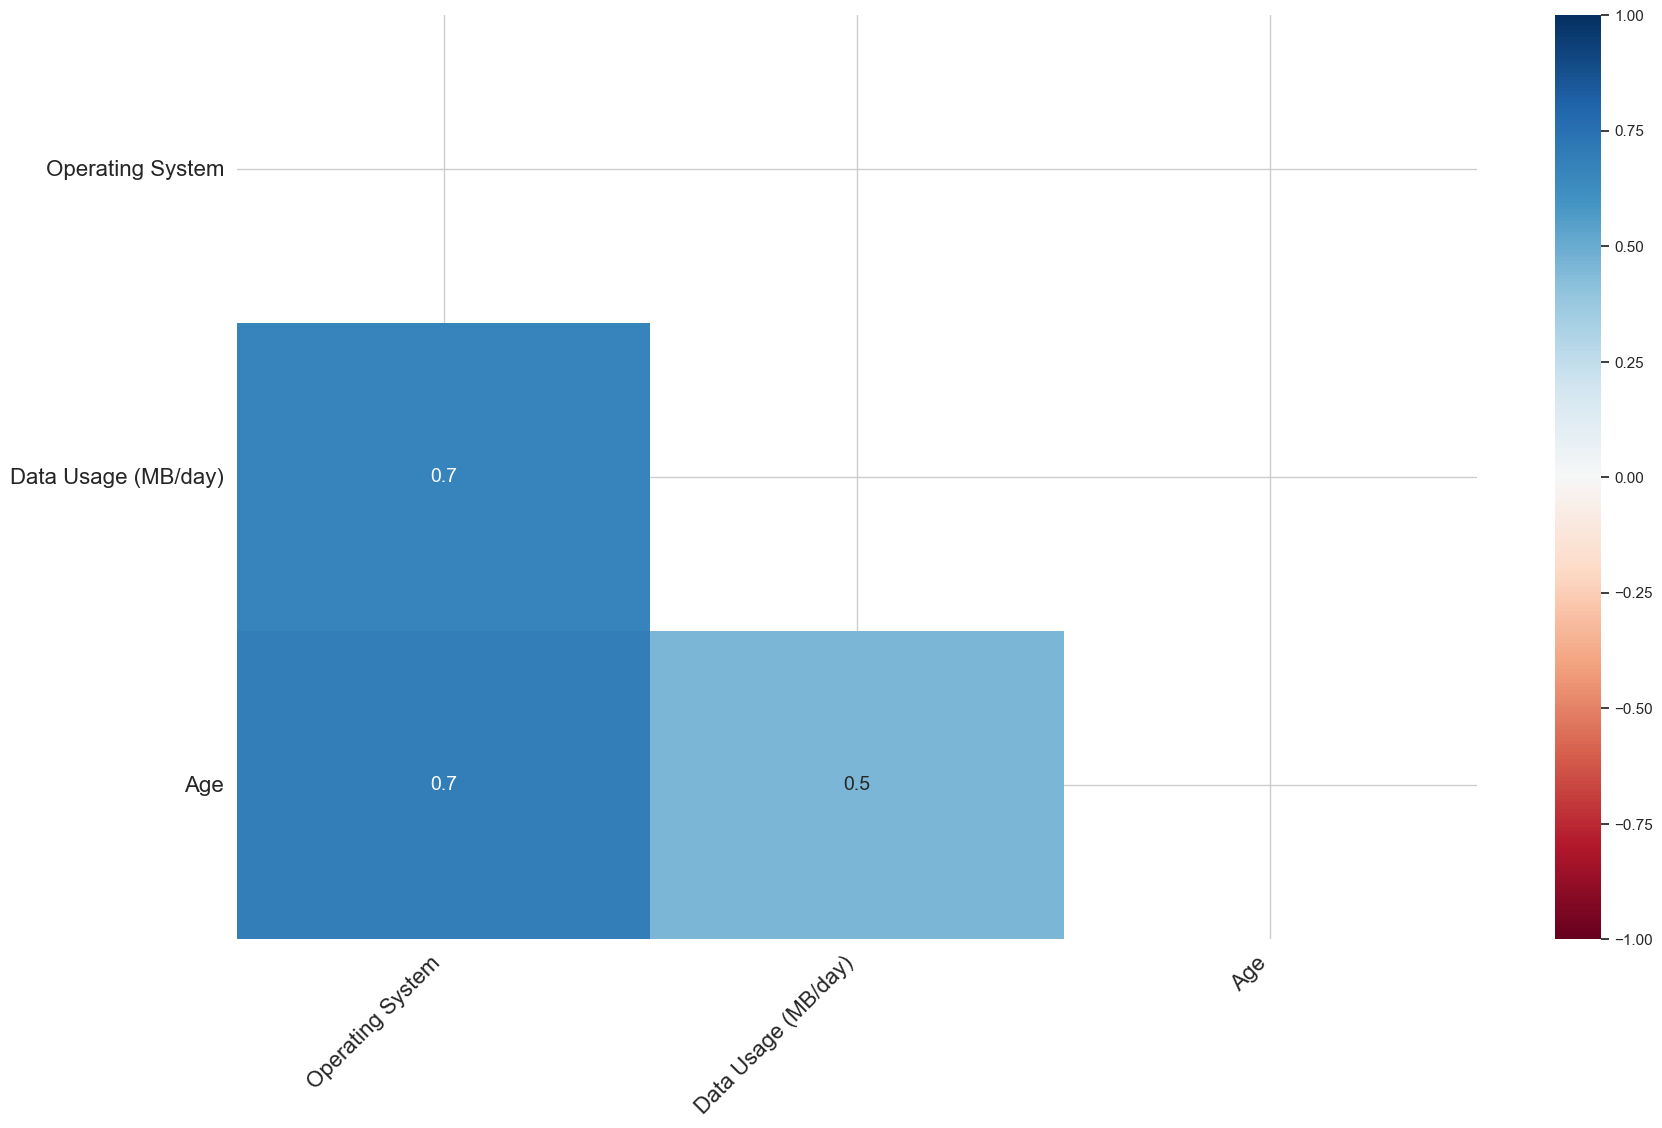

In [88]:
msno.heatmap(df)
plt.show()

<Axes: >

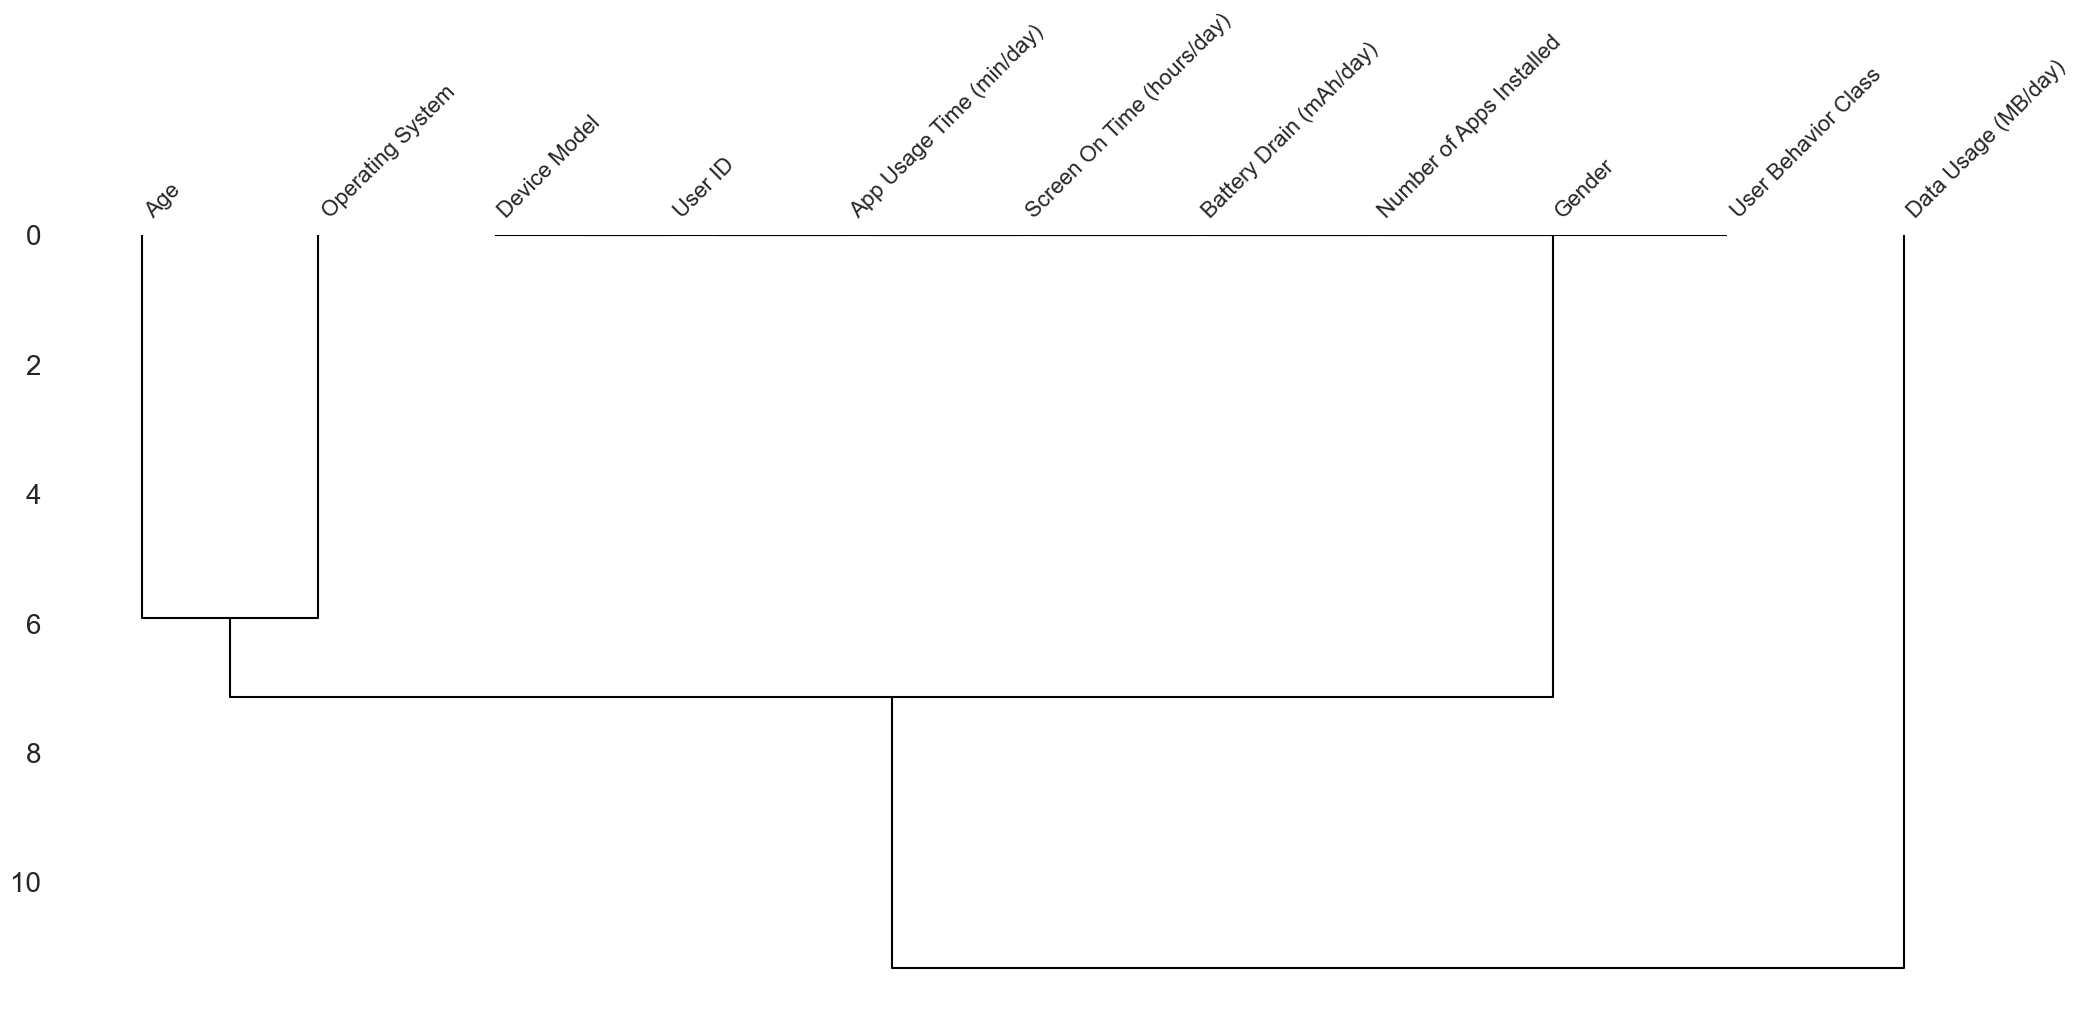

In [89]:
msno.dendrogram(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [123]:
encoder = LabelEncoder()
df['Operating System'] = encoder.fit_transform(df['Operating System'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Device Model'] = encoder.fit_transform(df['Device Model'])

In [124]:
mean_imputer = SimpleImputer(strategy='mean')
df['Data Usage (MB/day)'] = mean_imputer.fit_transform(df[['Data Usage (MB/day)']])
df['Data Usage (MB/day)'] = round(df['Data Usage (MB/day)'], 2)

mice = IterativeImputer(random_state=0)
imputed_values = mice.fit_transform(df[['Age', 'Operating System']])
df[['Age', 'Operating System']] = imputed_values
df['Age'] = df['Age'].round().astype(int)
df['Operating System'] = df['Operating System'].round().astype(int)

In [125]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122.00,40,1,4
1,2,1,0,268,4.7,1331,42,944.00,47,0,3
2,3,3,0,154,4.0,761,32,942.33,42,1,2
3,4,0,0,239,4.8,1676,56,871.00,20,1,3
4,5,4,1,187,4.3,1367,58,988.00,31,0,3


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [126]:
x = df.drop('User Behavior Class', axis=1)
y = df['User Behavior Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [127]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## Model Selection

Choose and train an approriate model for the given task.

In [149]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_x, train_y)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [150]:
predictions = classifier.predict(test_x)

Assess the performance of the model by using different classification metrics.

In [151]:
print(classification_report(predictions, test_y))

              precision    recall  f1-score   support

           1       0.67      0.95      0.78        19
           2       0.90      0.74      0.81        35
           3       0.97      0.89      0.93        37
           4       0.93      0.83      0.88        30
           5       0.83      1.00      0.90        19

    accuracy                           0.86       140
   macro avg       0.86      0.88      0.86       140
weighted avg       0.88      0.86      0.87       140



In [152]:
accuracy_score(predictions, test_y)

0.8642857142857143

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [153]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [155]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

classifier = KNeighborsClassifier(n_neighbors=5)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [156]:
exp_values = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(estimator=classifier, param_grid=exp_values, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [158]:
print(f"Best n_neighbours: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best n_neighbours: 5
Best cross-validation score: 0.9444444444444444


In [162]:
prediction = best_knn.predict(test_x)
# test_score = best_knn.score(test_x, test_y)
test_score = accuracy_score(prediction, test_y)
print(f"Test set score: {test_score}")

Test set score: 0.8428571428571429


In [163]:
print(classification_report(prediction, test_y))

              precision    recall  f1-score   support

           1       0.59      1.00      0.74        10
           2       0.88      0.64      0.74        22
           3       0.93      0.88      0.90        16
           4       1.00      0.90      0.95        10
           5       0.92      1.00      0.96        12

    accuracy                           0.84        70
   macro avg       0.86      0.88      0.86        70
weighted avg       0.87      0.84      0.84        70

